<a href="https://colab.research.google.com/github/Moly-malibu/CovicCapstonn.r/blob/main/Covicapst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                                     Executive Summary

##Describes the Data Set




##Summary: 

The Hopkins data is available at the county level in the United States. The AP has paired this data with population figures and county rural/urban designations, and has calculated caseload and death rates per 100,000 people. Be aware that caseloads may reflect the availability of tests, and the ability to turn around test results quickly, rather than actual disease spread or true infection rates.

##Data information: 

Johns Hopkins' county-level COVID-19 case and death data, paired with population and rates per 100,000.
Source:  https://data.world/associatedpress/johns-hopkins-coronavirus-case-tracker
https://data.world/associatedpress/johns-hopkins-coronavirus-case-trackerhttps://data.world/resources/coronavirus/

##Variables:

This data set has the variables, annd Ten (10) columns and  3,269 rows:

*Date: last update: In which the database has been updated by The Associated Press johns-hopkins. Highlighting this database is automatically updated from the data.world page since it is directly connected to this project.*

*Ubication Geographic: Data set collected in the United Stated by Location type, State, County_name, County name long.*

*Coordinate: Fips code, Latitude, Longitude.*

*Size of population by geographic: NCHS  Urbanization: Medium metro, small metro, non core, large fringe metro, micropolitan.* 

*Population segmentation: Total Population subdivide by Confirmed (covic) and Confirmed per 100.000.*

*Population segmentation by Deaths and Deaths per 100.000 (covic).*


#Summarizes the Goal of project:

This project has the objective to analyze the actual pandemic issue that has affected the society, families and the economy, the emphasis is to identifique what are the places with more impact in the state of the United States. To accomplish this objectives we performed the next steps: data cleaning, exploration, visualization, model approach and finally prediction.

## Installing libraries

In [2]:
install.packages('caret')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’




In [3]:
install.packages('mlbench')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Importing libraries

In [15]:
library(dplyr)
library(magrittr)
library(knitr)
library(MASS)
library(lattice)
library(tidyverse)
library(mlbench)
library(tidyverse)
library(ggplot2)
library(caret)

## How many CPU cores are there?

In [20]:
library(parallel)
detectCores(all.tests = FALSE, logical = TRUE)

[1] 2

In [145]:
#Load data set directt from data world page.
#Read File and Columns name.
df <- read.csv('https://query.data.world/s/e7co64e3e47t3sdnrviomq3sasf6g2')
head(df)

,last_update,location_type,state,county_name,county_name_long,fips_code,lat,lon,NCHS_urbanization,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>
1,2021-02-11 22:24:18 UTC,county,Alabama,Autauga,"Autauga, Alabama, US",1001,32.53953,-86.64408,Medium metro,55200,5970,10815.22,81,146.74
2,2021-02-11 22:24:18 UTC,county,Alabama,Baldwin,"Baldwin, Alabama, US",1003,30.72775,-87.72207,Small metro,208107,18960,9110.70,240,115.33
3,2021-02-11 22:24:18 UTC,county,Alabama,Barbour,"Barbour, Alabama, US",1005,31.86826,-85.38713,Non-core,25782,2030,7873.71,46,178.42
4,2021-02-11 22:24:18 UTC,county,Alabama,Bibb,"Bibb, Alabama, US",1007,32.99642,-87.12511,Large fringe metro,22527,2377,10551.78,54,239.71
5,2021-02-11 22:24:18 UTC,county,Alabama,Blount,"Blount, Alabama, US",1009,33.98211,-86.56791,Large fringe metro,57645,5955,10330.47,116,201.23
6,2021-02-11 22:24:18 UTC,county,Alabama,Bullock,"Bullock, Alabama, US",1011,32.10031,-85.71266,Non-core,10352,1136,10973.72,32,309.12


In [146]:
#Create a data sett My data and replace nan from original data set
my_data <- as_tibble(df)
my_data <- replace(my_data, is.na(my_data), 0)
my_data

last_update,location_type,state,county_name,county_name_long,fips_code,lat,lon,NCHS_urbanization,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>
2021-02-11 22:24:18 UTC,county,Alabama,Autauga,"Autauga, Alabama, US",1001,32.53953,-86.64408,Medium metro,55200,5970,10815.22,81,146.74
2021-02-11 22:24:18 UTC,county,Alabama,Baldwin,"Baldwin, Alabama, US",1003,30.72775,-87.72207,Small metro,208107,18960,9110.70,240,115.33
2021-02-11 22:24:18 UTC,county,Alabama,Barbour,"Barbour, Alabama, US",1005,31.86826,-85.38713,Non-core,25782,2030,7873.71,46,178.42
2021-02-11 22:24:18 UTC,county,Alabama,Bibb,"Bibb, Alabama, US",1007,32.99642,-87.12511,Large fringe metro,22527,2377,10551.78,54,239.71
2021-02-11 22:24:18 UTC,county,Alabama,Blount,"Blount, Alabama, US",1009,33.98211,-86.56791,Large fringe metro,57645,5955,10330.47,116,201.23
2021-02-11 22:24:18 UTC,county,Alabama,Bullock,"Bullock, Alabama, US",1011,32.10031,-85.71266,Non-core,10352,1136,10973.72,32,309.12
2021-02-11 22:24:18 UTC,county,Alabama,Butler,"Butler, Alabama, US",1013,31.75300,-86.68057,Non-core,20025,1886,9418.23,64,319.60
2021-02-11 22:24:18 UTC,county,Alabama,Calhoun,"Calhoun, Alabama, US",1015,33.77484,-85.82630,Small metro,115098,12539,10894.19,257,223.29
2021-02-11 22:24:18 UTC,county,Alabama,Chambers,"Chambers, Alabama, US",1017,32.91360,-85.39073,Micropolitan,33826,3305,9770.59,92,271.98


In [147]:
#filter only integer data to developmente the differents analysis.
new_data = my_data %>% select_if(is.numeric)
new_data

fips_code,lat,lon,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000
<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>
1001,32.53953,-86.64408,55200,5970,10815.22,81,146.74
1003,30.72775,-87.72207,208107,18960,9110.70,240,115.33
1005,31.86826,-85.38713,25782,2030,7873.71,46,178.42
1007,32.99642,-87.12511,22527,2377,10551.78,54,239.71
1009,33.98211,-86.56791,57645,5955,10330.47,116,201.23
1011,32.10031,-85.71266,10352,1136,10973.72,32,309.12
1013,31.75300,-86.68057,20025,1886,9418.23,64,319.60
1015,33.77484,-85.82630,115098,12539,10894.19,257,223.29
1017,32.91360,-85.39073,33826,3305,9770.59,92,271.98


The principal variable that we will analyze is, how many cases of infected by Covic have been given in different states of the United States, now we have that the average of confirmed by covic is 834 the median is 2073. In the other hands, the mean for the deaths cause by covic is 8324 and the median is 37, standard deviation 557. Note that this data set is automatically update every day, this data can be change.

In [148]:
#Mean, Media and Standard deviation of confirmed by Covic 19
mean=mean(new_data[['confirmed']])
median=median(new_data[['confirmed']])
standard_deviation= sd(new_data[['confirmed']])
print((paste0('Mean of Confirmed  cases cause for Covic:', mean)))
print((paste0('Median of Confirmed  cases cause for Covic:', median)))
print((paste0('Standar Deviation of Confirmed  cases cause by Covic:', standard_deviation)))

[1] "Mean of Confirmed  cases cause for Covic:8372.10308962986"
[1] "Median of Confirmed  cases cause for Covic:2098"
[1] "Standar Deviation of Confirmed  cases cause by Covic:31570.7216498762"


In [149]:
meean=mean(df[['deaths']])
median=median(df[['deaths']])
sd=sd(df[['deaths']])
print((paste0('Mean of deaths cases cause for Covic:', mean)))
print((paste0('Median of deaths  cases cause for Covic:', median)))
print((paste0('Standar Deviation of deaths  cases cause by Covic:', sd)))

[1] "Mean of deaths cases cause for Covic:8372.10308962986"
[1] "Median of deaths  cases cause for Covic:38"
[1] "Standar Deviation of deaths  cases cause by Covic:563.249425097098"


#Covariance data set Covic
For a sample of cases confirmed of 100,000 inhabitants, the covariance is of the 3% and the correlation is the 1% deaths by covic.

In [150]:
cov(new_data)

,fips_code,lat,lon,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000
fips_code,324226875.95,-56099.34517,149557.7869,-4.217084e+08,-4.189214e+07,-16653561.792,-6.408430e+05,-3.652941e+05
lat,-56099.35,65.29220,-101.2963,5.238697e+03,-3.504591e+03,7080.973,-4.562655e+01,8.265325e+01
lon,149557.79,-101.29632,340.8037,-2.280191e+05,-1.819058e+04,-19924.971,1.614984e+02,-2.876492e+02
total_population,-421708351.44,5238.69725,-228019.0918,1.049150e+11,9.878103e+09,1357235.075,1.678857e+08,-1.216537e+06
confirmed,-41892141.00,-3504.59054,-18190.5775,9.878103e+09,9.967105e+08,5774985.088,1.642055e+07,-3.418420e+04
confirmed_per_100000,-16653561.79,7080.97347,-19924.9712,1.357235e+06,5.774985e+06,10755044.224,6.499472e+04,1.966135e+05
deaths,-640842.97,-45.62655,161.4984,1.678857e+08,1.642055e+07,64994.717,3.172499e+05,3.524229e+03
deaths_per_100000,-365294.07,82.65325,-287.6492,-1.216537e+06,-3.418420e+04,196613.510,3.524229e+03,1.115610e+04


#Correlacion data set Covic

In [151]:
cor(new_data)

,fips_code,lat,lon,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000
fips_code,1.00000000,-0.385569470,0.44991699,-0.072305090,-0.07369254,-0.282017804,-0.06318680,-0.19207108
lat,-0.38556947,1.000000000,-0.67906429,0.002001584,-0.01373796,0.267212161,-0.01002504,0.09684410
lon,0.44991699,-0.679064288,1.00000000,-0.038132937,-0.03121116,-0.329108783,0.01553157,-0.14752136
total_population,-0.07230509,0.002001584,-0.03813294,1.000000000,0.96598466,0.001277704,0.92022543,-0.03555906
confirmed,-0.07369254,-0.013737956,-0.03121116,0.965984661,1.00000000,0.055777656,0.92342699,-0.01025144
confirmed_per_100000,-0.28201780,0.267212161,-0.32910878,0.001277704,0.05577766,1.000000000,0.03518611,0.56761140
deaths,-0.06318680,-0.010025042,0.01553157,0.920225434,0.92342699,0.035186105,1.00000000,0.05923892
deaths_per_100000,-0.19207108,0.096844099,-0.14752136,-0.035559058,-0.01025144,0.567611399,0.05923892,1.00000000


In [152]:
#Read File and Columns name str.
str(new_data)

tibble [3,269 × 8] (S3: tbl_df/tbl/data.frame)
 $ fips_code           : int [1:3269] 1001 1003 1005 1007 1009 1011 1013 1015 1017 1019 ...
 $ lat                 : num [1:3269] 32.5 30.7 31.9 33 34 ...
 $ lon                 : num [1:3269] -86.6 -87.7 -85.4 -87.1 -86.6 ...
 $ total_population    : num [1:3269] 55200 208107 25782 22527 57645 ...
 $ confirmed           : int [1:3269] 5970 18960 2030 2377 5955 1136 1886 12539 3305 1738 ...
 $ confirmed_per_100000: num [1:3269] 10815 9111 7874 10552 10330 ...
 $ deaths              : int [1:3269] 81 240 46 54 116 32 64 257 92 37 ...
 $ deaths_per_100000   : num [1:3269] 147 115 178 240 201 ...


#Summary show us the minimu, max and median and mean the all data set.

In [153]:
summary(new_data)

   fips_code          lat             lon          total_population  
 Min.   :    0   Min.   : 0.00   Min.   :-174.16   Min.   :       0  
 1st Qu.:19041   1st Qu.:34.02   1st Qu.: -97.73   1st Qu.:   10447  
 Median :30061   Median :38.04   Median : -89.52   Median :   25324  
 Mean   :32312   Mean   :37.18   Mean   : -89.66   Mean   :   99546  
 3rd Qu.:47035   3rd Qu.:41.65   3rd Qu.: -82.51   3rd Qu.:   65558  
 Max.   :90056   Max.   :69.31   Max.   :   0.00   Max.   :10098052  
   confirmed       confirmed_per_100000     deaths        deaths_per_100000
 Min.   :      0   Min.   :    0        Min.   :    0.0   Min.   :  0.00   
 1st Qu.:    845   1st Qu.: 6564        1st Qu.:   13.0   1st Qu.: 80.68   
 Median :   2098   Median : 8492        Median :   38.0   Median :142.46   
 Mean   :   8372   Mean   : 8309        Mean   :  145.3   Mean   :155.99   
 3rd Qu.:   5475   3rd Qu.:10276        3rd Qu.:   90.0   3rd Qu.:210.60   
 Max.   :1155491   Max.   :33464        Max.   :18519.

In [154]:
str(df)

'data.frame':	3269 obs. of  14 variables:
 $ last_update         : chr  "2021-02-11 22:24:18 UTC" "2021-02-11 22:24:18 UTC" "2021-02-11 22:24:18 UTC" "2021-02-11 22:24:18 UTC" ...
 $ location_type       : chr  "county" "county" "county" "county" ...
 $ state               : chr  "Alabama" "Alabama" "Alabama" "Alabama" ...
 $ county_name         : chr  "Autauga" "Baldwin" "Barbour" "Bibb" ...
 $ county_name_long    : chr  "Autauga, Alabama, US" "Baldwin, Alabama, US" "Barbour, Alabama, US" "Bibb, Alabama, US" ...
 $ fips_code           : int  1001 1003 1005 1007 1009 1011 1013 1015 1017 1019 ...
 $ lat                 : num  32.5 30.7 31.9 33 34 ...
 $ lon                 : num  -86.6 -87.7 -85.4 -87.1 -86.6 ...
 $ NCHS_urbanization   : chr  "Medium metro" "Small metro" "Non-core" "Large fringe metro" ...
 $ total_population    : num  55200 208107 25782 22527 57645 ...
 $ confirmed           : int  5970 18960 2030 2377 5955 1136 1886 12539 3305 1738 ...
 $ confirmed_per_100000: num  108

In [155]:
summary(df)

 last_update        location_type         state           county_name       
 Length:3269        Length:3269        Length:3269        Length:3269       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 county_name_long     fips_code          lat             lon         
 Length:3269        Min.   : 1001   Min.   :17.98   Min.   :-174.16  
 Class :character   1st Qu.:19056   1st Qu.:34.34   1st Qu.: -97.93  
 Mode  :character   Median :30071   Median :38.19   Median : -89.92  
                    Mean   :32412   Mean   :37.96   Mean   : -91.54  
                    3rd Qu.:47040 

In [156]:
df$deaths <- factor(df$deaths,
            levels=c(0, 1),
            labels=c('confirmed', 'deaths'))

In [157]:
summary(new_data$deaths)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    13.0    38.0   145.3    90.0 18519.0 

In [158]:
which.max(df[['deaths']])
which.max(df[['confirmed']])

[1] 75

[1] 204

## Group by NCHS Urbanization and State from United States, in Medium, small, large, micropolitan and non-core

In [159]:
dataset <- df %>% group_by(NCHS_urbanization, state)
dataset

last_update,location_type,state,county_name,county_name_long,fips_code,lat,lon,NCHS_urbanization,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<dbl>,<fct>,<dbl>
2021-02-11 22:24:18 UTC,county,Alabama,Autauga,"Autauga, Alabama, US",1001,32.53953,-86.64408,Medium metro,55200,5970,10815.22,NA,146.74
2021-02-11 22:24:18 UTC,county,Alabama,Baldwin,"Baldwin, Alabama, US",1003,30.72775,-87.72207,Small metro,208107,18960,9110.70,NA,115.33
2021-02-11 22:24:18 UTC,county,Alabama,Barbour,"Barbour, Alabama, US",1005,31.86826,-85.38713,Non-core,25782,2030,7873.71,NA,178.42
2021-02-11 22:24:18 UTC,county,Alabama,Bibb,"Bibb, Alabama, US",1007,32.99642,-87.12511,Large fringe metro,22527,2377,10551.78,NA,239.71
2021-02-11 22:24:18 UTC,county,Alabama,Blount,"Blount, Alabama, US",1009,33.98211,-86.56791,Large fringe metro,57645,5955,10330.47,NA,201.23
2021-02-11 22:24:18 UTC,county,Alabama,Bullock,"Bullock, Alabama, US",1011,32.10031,-85.71266,Non-core,10352,1136,10973.72,NA,309.12
2021-02-11 22:24:18 UTC,county,Alabama,Butler,"Butler, Alabama, US",1013,31.75300,-86.68057,Non-core,20025,1886,9418.23,NA,319.60
2021-02-11 22:24:18 UTC,county,Alabama,Calhoun,"Calhoun, Alabama, US",1015,33.77484,-85.82630,Small metro,115098,12539,10894.19,NA,223.29
2021-02-11 22:24:18 UTC,county,Alabama,Chambers,"Chambers, Alabama, US",1017,32.91360,-85.39073,Micropolitan,33826,3305,9770.59,NA,271.98


#Analysis cases confirmed and deaths group by states.

In [160]:
dataset %>% summarise(
  confirmed=mean(confirmed),
  deaths=mean(deaths)
)

Warning message in mean.default(deaths):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(deaths):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(deaths):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(deaths):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(deaths):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(deaths):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(deaths):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(deaths):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(deaths):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(deaths):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(deaths):
“argument is not numeric or logical: re

NCHS_urbanization,state,confirmed,deaths
<chr>,<chr>,<dbl>,<dbl>
,Alabama,0.0,NA
,Alaska,251.0,NA
,Arizona,1.5,NA
,Arkansas,2914.0,NA
,California,0.0,NA
,Colorado,21.5,NA
,Connecticut,898.0,NA
,Delaware,184.0,NA
,Florida,3384.0,NA


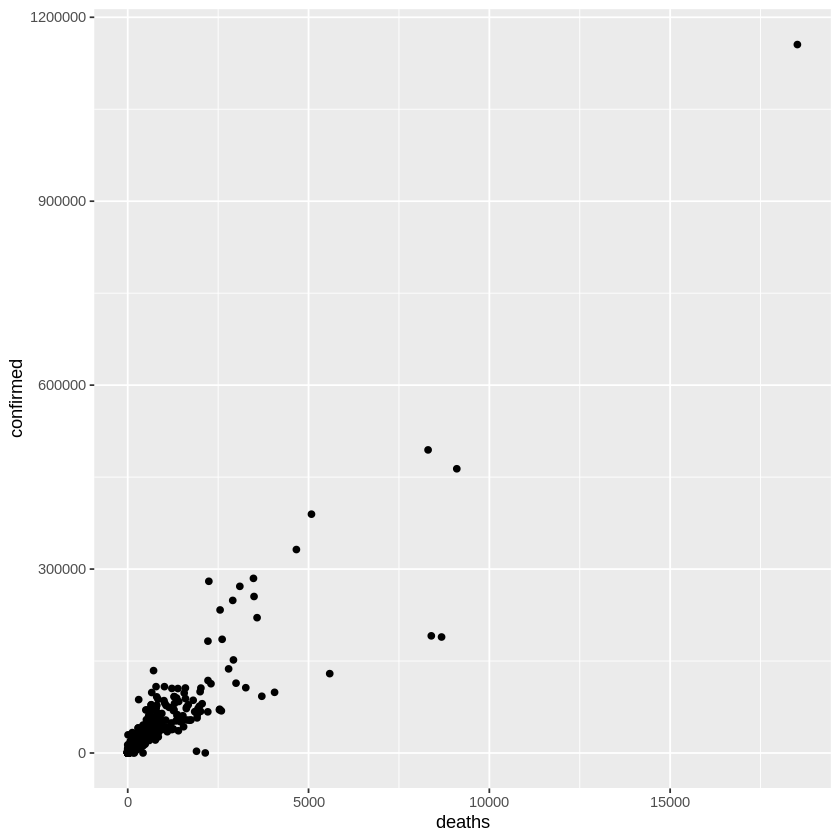

In [164]:
ggplot(new_data, aes(deaths, confirmed)) + geom_point()

In [165]:
dataset %>% filter(total_population==max(total_population))

last_update,location_type,state,county_name,county_name_long,fips_code,lat,lon,NCHS_urbanization,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<dbl>,<fct>,<dbl>
2021-02-11 22:24:18 UTC,county,Alabama,Baldwin,"Baldwin, Alabama, US",1003,30.72775,-87.72207,Small metro,208107,18960,9110.70,NA,115.33
2021-02-11 22:24:18 UTC,county,Alabama,DeKalb,"DeKalb, Alabama, US",1049,34.45947,-85.80783,Non-core,71200,8332,11702.25,NA,227.53
2021-02-11 22:24:18 UTC,county,Alabama,Jefferson,"Jefferson, Alabama, US",1073,33.55555,-86.89506,Large central metro,659892,69117,10473.99,NA,191.70
2021-02-11 22:24:18 UTC,county,Alabama,Marshall,"Marshall, Alabama, US",1095,34.36976,-86.30487,Micropolitan,95145,11057,11621.21,NA,200.75
2021-02-11 22:24:18 UTC,county,Alabama,Mobile,"Mobile, Alabama, US",1097,30.78472,-88.20842,Medium metro,414659,34555,8333.35,NA,160.86
2021-02-11 22:24:18 UTC,county,Alabama,Shelby,"Shelby, Alabama, US",1117,33.26880,-86.66233,Large fringe metro,211261,21098,9986.70,NA,90.88
2021-02-11 22:24:18 UTC,county,Alaska,Anchorage,"Anchorage, Alaska, US",2020,61.14998,-149.14270,Medium metro,296112,26011,8784.18,NA,51.33
2021-02-11 22:24:18 UTC,county,Alaska,Fairbanks North Star,"Fairbanks North Star, Alaska, US",2090,64.80726,-146.56927,Small metro,99653,6018,6038.96,NA,26.09
2021-02-11 22:24:18 UTC,county,Alaska,Juneau,"Juneau, Alaska, US",2110,58.45032,-134.20044,Micropolitan,32330,1205,3727.19,NA,15.47


In [166]:
dataset %>% filter(confirmed_per_100000==max(confirmed_per_100000))

last_update,location_type,state,county_name,county_name_long,fips_code,lat,lon,NCHS_urbanization,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<dbl>,<fct>,<dbl>
2021-02-11 22:24:18 UTC,county,Alabama,Bibb,"Bibb, Alabama, US",1007,32.99642,-87.12511,Large fringe metro,22527,2377,10551.78,NA,239.71
2021-02-11 22:24:18 UTC,county,Alabama,Clarke,"Clarke, Alabama, US",1025,31.68100,-87.83549,Non-core,24387,3367,13806.54,NA,176.32
2021-02-11 22:24:18 UTC,county,Alabama,Hale,"Hale, Alabama, US",1065,32.76039,-87.63285,Small metro,14887,2011,13508.43,NA,382.88
2021-02-11 22:24:18 UTC,county,Alabama,Jackson,"Jackson, Alabama, US",1071,34.78144,-85.99750,Micropolitan,52094,6401,12287.40,NA,165.09
2021-02-11 22:24:18 UTC,county,Alabama,Jefferson,"Jefferson, Alabama, US",1073,33.55555,-86.89506,Large central metro,659892,69117,10473.99,NA,191.70
2021-02-11 22:24:18 UTC,county,Alabama,Lowndes,"Lowndes, Alabama, US",1085,32.15973,-86.65158,Medium metro,10236,1283,12534.19,NA,410.32
2021-02-11 22:24:18 UTC,county,Alaska,Anchorage,"Anchorage, Alaska, US",2020,61.14998,-149.14270,Medium metro,296112,26011,8784.18,NA,51.33
2021-02-11 22:24:18 UTC,county,Alaska,Bethel,"Bethel, Alaska, US",2050,60.90980,-159.85618,Non-core,18040,3498,19390.24,NA,94.24
2021-02-11 22:24:18 UTC,county,Alaska,Fairbanks North Star,"Fairbanks North Star, Alaska, US",2090,64.80726,-146.56927,Small metro,99653,6018,6038.96,NA,26.09


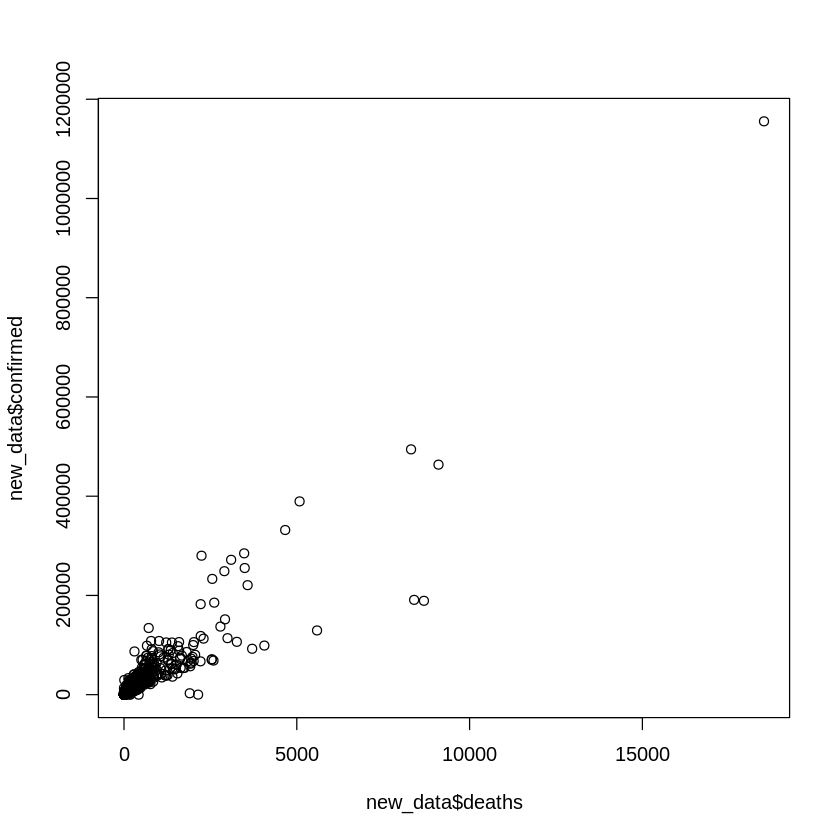

In [167]:
plot(new_data$deaths, new_data$confirmed)

##Visualization cases confirmed compared with the deaths.

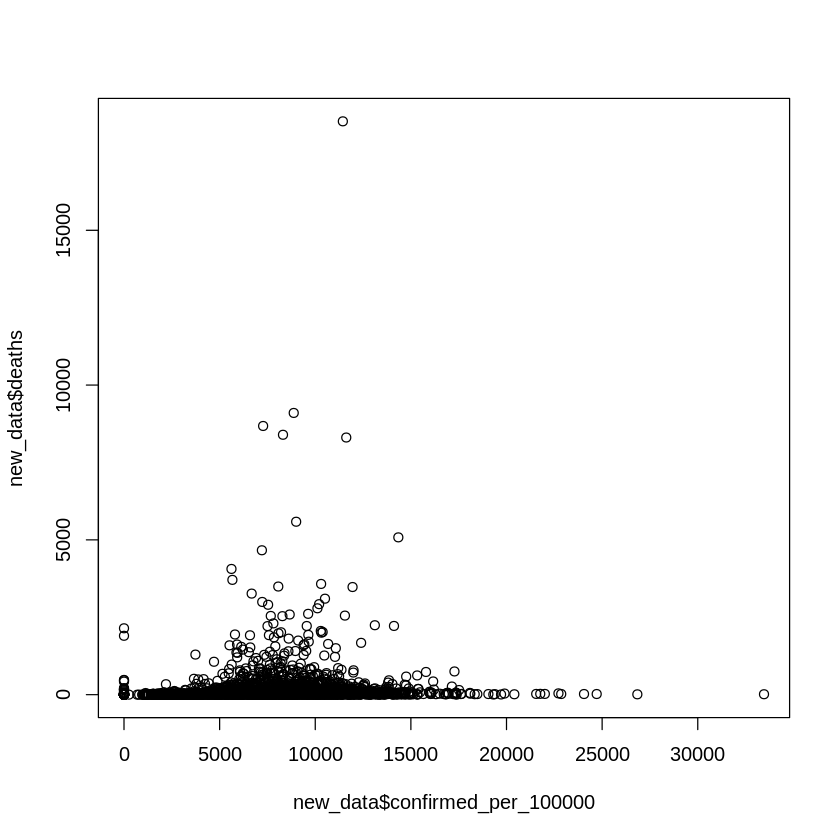

In [168]:
plot(new_data$confirmed_per_100000, new_data$deaths)

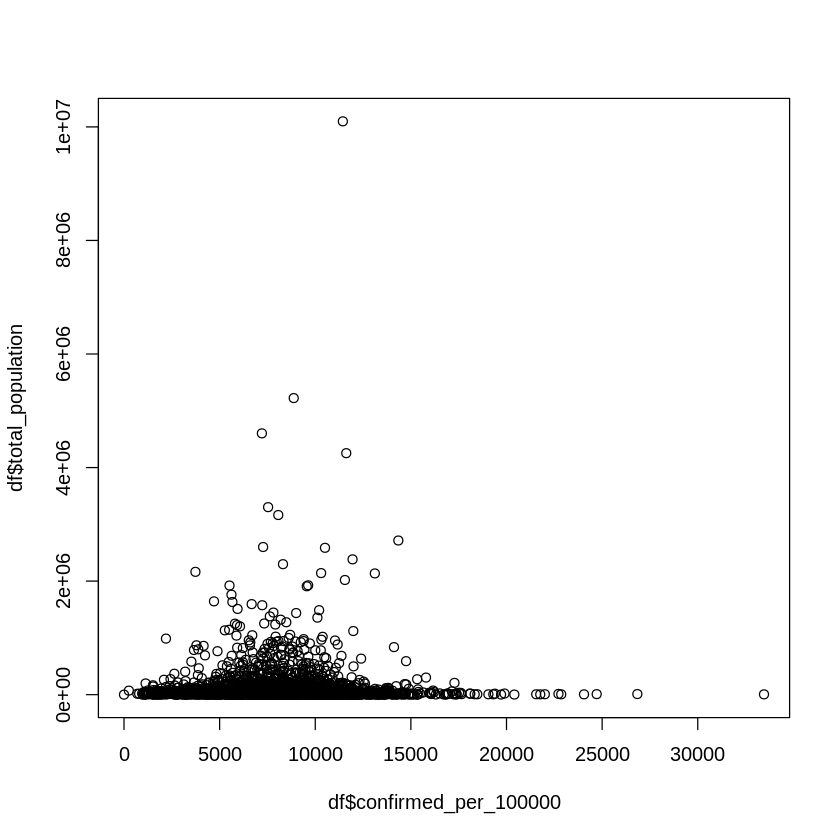

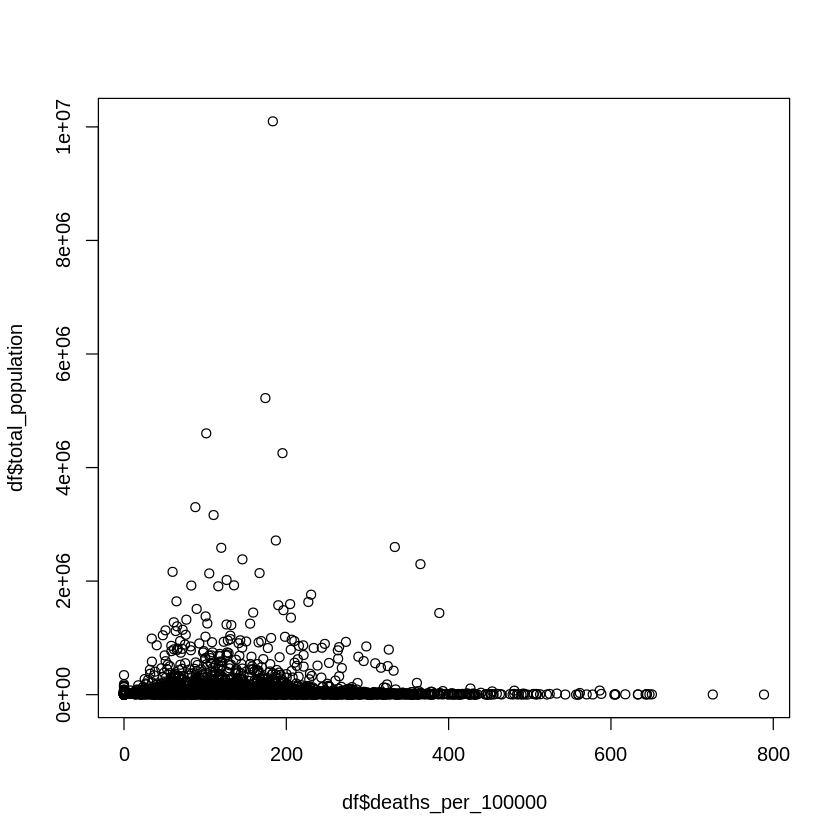

In [169]:

plot(df$confirmed_per_100000, df$total_population)
title(plot(df$deaths_per_100000, df$total_population))

In [170]:
dataset %>% filter(deaths_per_100000==max(deaths_per_100000))

last_update,location_type,state,county_name,county_name_long,fips_code,lat,lon,NCHS_urbanization,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<dbl>,<fct>,<dbl>
2021-02-11 22:24:18 UTC,county,Alabama,Clay,"Clay, Alabama, US",1027,33.26984,-85.85836,Non-core,13378,1386,10360.29,NA,396.17
2021-02-11 22:24:18 UTC,county,Alabama,Dallas,"Dallas, Alabama, US",1047,32.32688,-87.10867,Micropolitan,40029,3269,8166.58,NA,314.77
2021-02-11 22:24:18 UTC,county,Alabama,Hale,"Hale, Alabama, US",1065,32.76039,-87.63285,Small metro,14887,2011,13508.43,NA,382.88
2021-02-11 22:24:18 UTC,county,Alabama,Jefferson,"Jefferson, Alabama, US",1073,33.55555,-86.89506,Large central metro,659892,69117,10473.99,NA,191.70
2021-02-11 22:24:18 UTC,county,Alabama,Lowndes,"Lowndes, Alabama, US",1085,32.15973,-86.65158,Medium metro,10236,1283,12534.19,NA,410.32
2021-02-11 22:24:18 UTC,county,Alabama,Walker,"Walker, Alabama, US",1127,33.80271,-87.30027,Large fringe metro,64493,6325,9807.27,NA,362.83
2021-02-11 22:24:18 UTC,county,Alaska,Anchorage,"Anchorage, Alaska, US",2020,61.14998,-149.14270,Medium metro,296112,26011,8784.18,NA,51.33
2021-02-11 22:24:18 UTC,county,Alaska,Fairbanks North Star,"Fairbanks North Star, Alaska, US",2090,64.80726,-146.56927,Small metro,99653,6018,6038.96,NA,26.09
2021-02-11 22:24:18 UTC,county,Alaska,Juneau,"Juneau, Alaska, US",2110,58.45032,-134.20044,Micropolitan,32330,1205,3727.19,NA,15.47


##Visualization compared total population with cases confirmed and deaths.

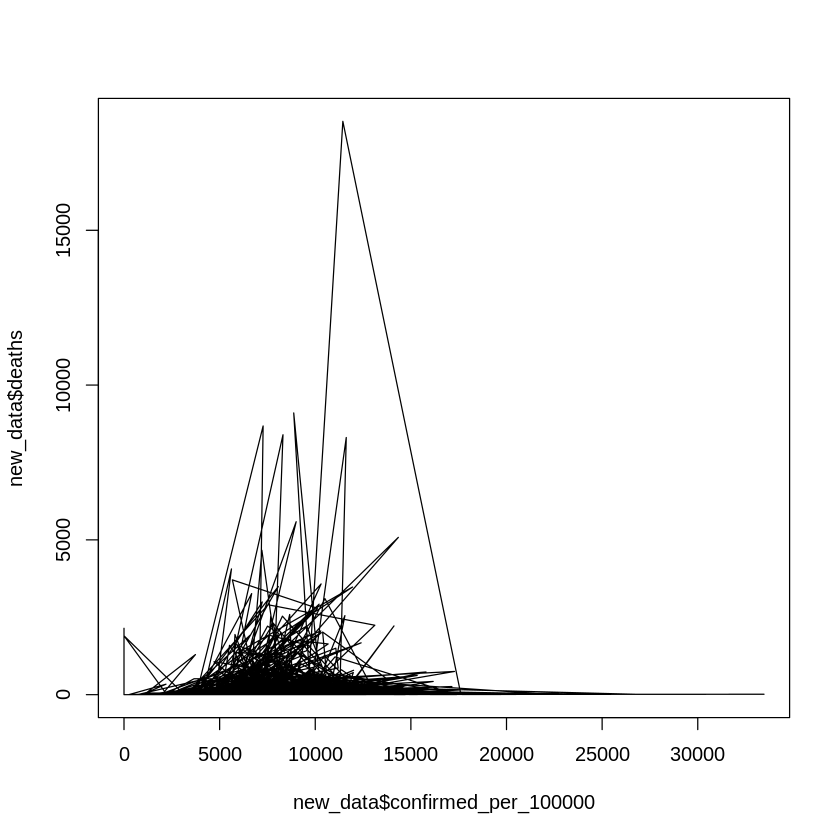

In [171]:
plot(new_data$confirmed_per_100000, new_data$deaths, type='l')

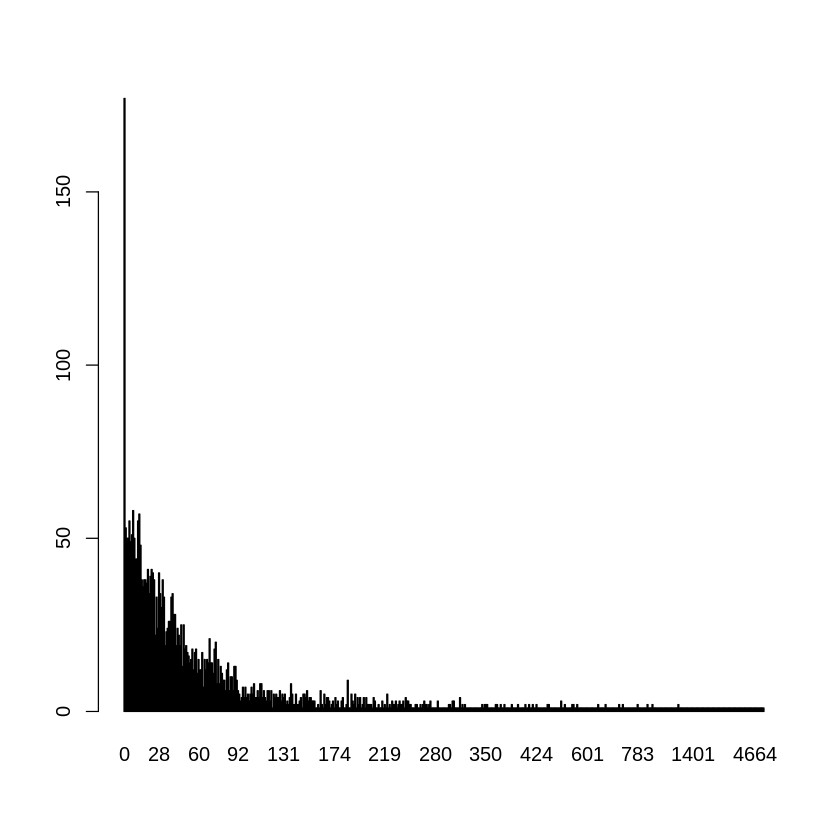

In [172]:
#Barplot compared deaths
barplot(table(new_data$deaths))

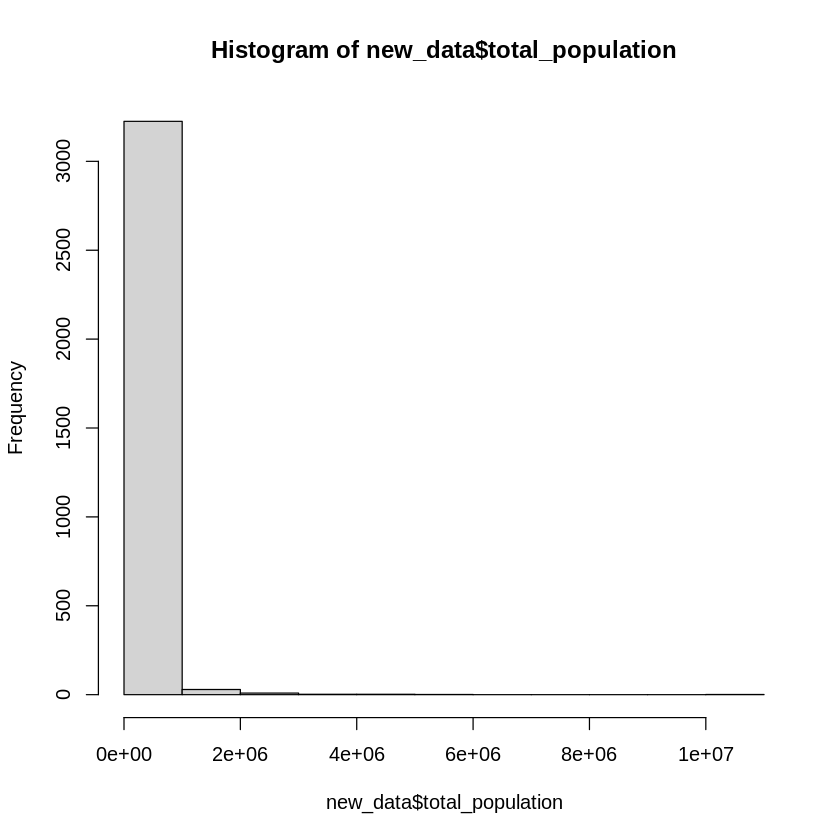

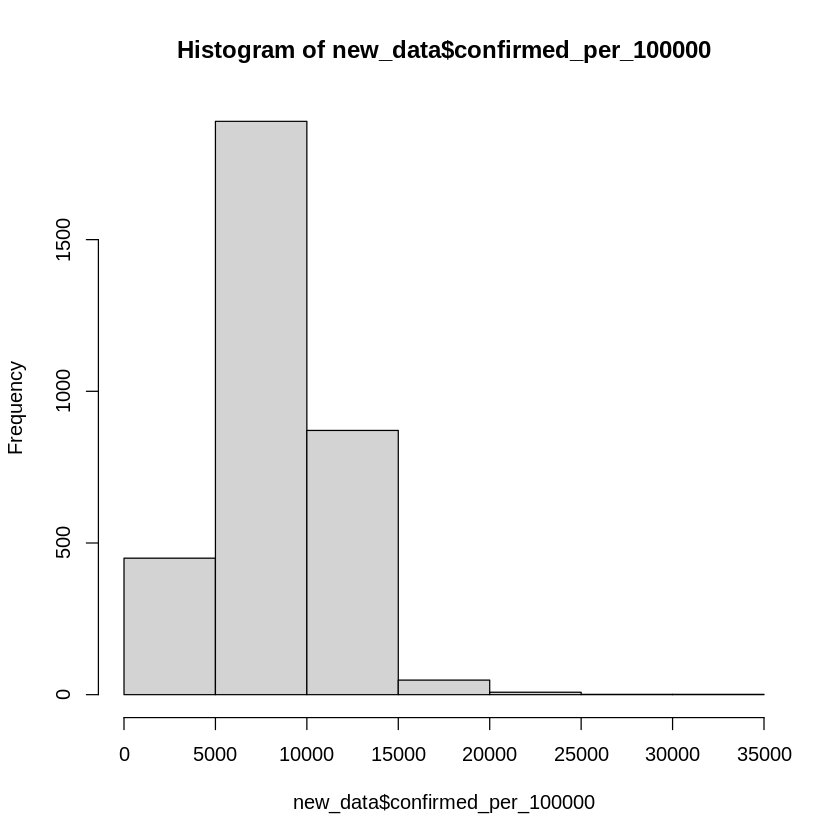

In [173]:
hist(new_data$total_population)
hist(new_data$confirmed_per_100000, breaks=10)

#Visualization show differents the states with most deaths us that california is one the most deaths had.

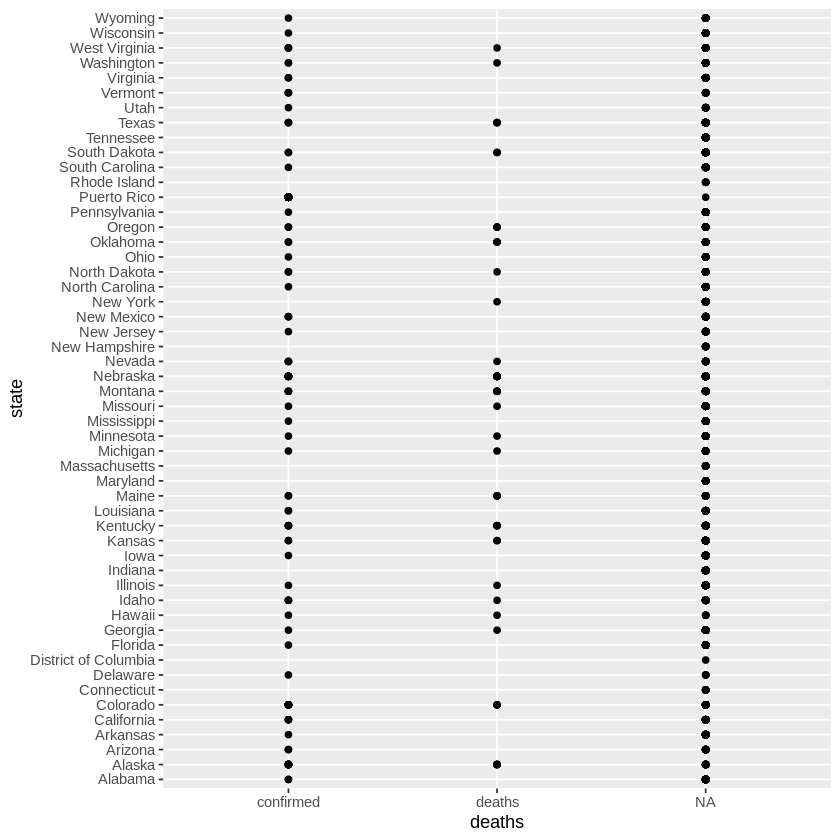

In [188]:
ggplot(df, aes(x=deaths, y=state)) + geom_point()

Using zoom = 3...



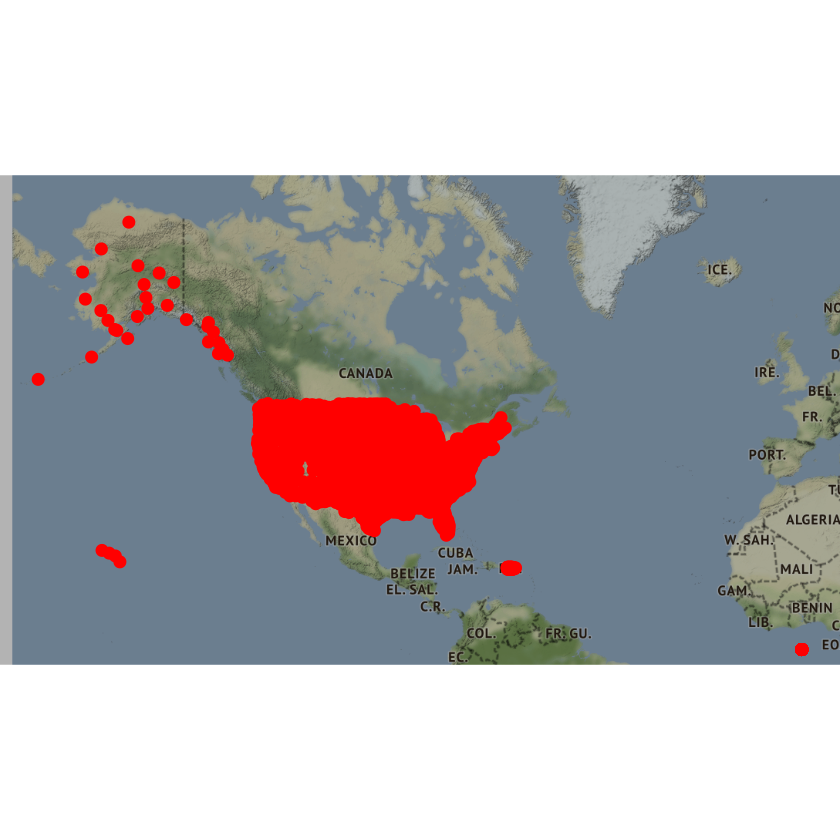

In [196]:
geopoin <- subset(df, state == 'deaths') 
qmplot(lon, lat, data=df, colour=I('red'), size=I(3), darken=.3)

## Prediction

The prediction show us that for 24 people infected 2 would death and this prediction has 0.915 of accuracy and the precision is 0.913,  data that confirmed that the average of death for this virus can oscillate into 2% or 3% of impacted in the all population infected.

In [90]:
set.seed(0) 
  actual = c('confirmed', 'deaths')[runif(100, 1, 4)]
  predicted = actual 
  predicted[runif(30,1,100)] = actual[runif(30,1,100)]
  cm = as.matrix(table(Actual=actual, Predicted=predicted))
  cm

           Predicted
Actual      confirmed deaths
  confirmed        24      2
  deaths            3     30

In [91]:
 num_instances = sum(cm)  
 num_class = nrow(cm) 
 diag = diag(cm) #classified 
 rowsums = apply(cm, 1, sum) 
 colsums = apply(cm, 2, sum) #predictions 
 p = rowsums / num_instances # distribution of instances over the actual classes
 q = colsums / num_instances # distribution of instances over the predicted classes

In [92]:
accuracy = sum(diag) / num_instances 
accuracy 

[1] 0.9152542

In [93]:
precision = diag / colsums 
recall = diag / rowsums 
f1 = 2 * precision * recall / (precision + recall) 

In [94]:
data.frame(precision, recall, f1) 

,precision,recall,f1
,<dbl>,<dbl>,<dbl>
confirmed,0.8888889,0.9230769,0.9056604
deaths,0.9375000,0.9090909,0.9230769


In [95]:
macroPrecision = mean(precision)
macroRecall = mean(recall)
macroF1 = mean(f1)

In [96]:
data.frame(macroPrecision, macroRecall, macroF1)

macroPrecision,macroRecall,macroF1
<dbl>,<dbl>,<dbl>
0.9131944,0.9160839,0.9143687


# Machine Learning in R: 
# Building a Linear Regression Model 1


We build the model Linear Regression to analyze the relationship  between differents variable, as size of states more infectioned and deaths or analysis what is the most relevant variante. The coefficient and residuals give us the R-squared is 0.8478 and .8557 with p value of 2.2 a tendeced to increase the cases of deaths. 

In [125]:
lmcovic = lm(confirmed~deaths, data = df)
summary(lmcovic)


Call:
lm(formula = confirmed ~ deaths, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-260937   -1201    -717     141  196026 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 856.5516   218.9690   3.912 9.35e-05 ***
deaths       51.7635     0.3767 137.410  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12120 on 3267 degrees of freedom
Multiple R-squared:  0.8525,	Adjusted R-squared:  0.8525 
F-statistic: 1.888e+04 on 1 and 3267 DF,  p-value: < 2.2e-16


In [98]:
lmcovic2 = lm(confirmed~deaths + confirmed_per_100000, data=df)
summary(lmcovic2)


Call:
lm(formula = confirmed ~ deaths + confirmed_per_100000, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-263662   -1514    -590     504  188963 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -1048.3445   624.7193  -1.678  0.09342 .  
deaths                  52.1098     0.3723 139.981  < 2e-16 ***
confirmed_per_100000     0.2233     0.0691   3.231  0.00125 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11920 on 3191 degrees of freedom
  (75 observations deleted due to missingness)
Multiple R-squared:  0.8603,	Adjusted R-squared:  0.8602 
F-statistic:  9828 on 2 and 3191 DF,  p-value: < 2.2e-16


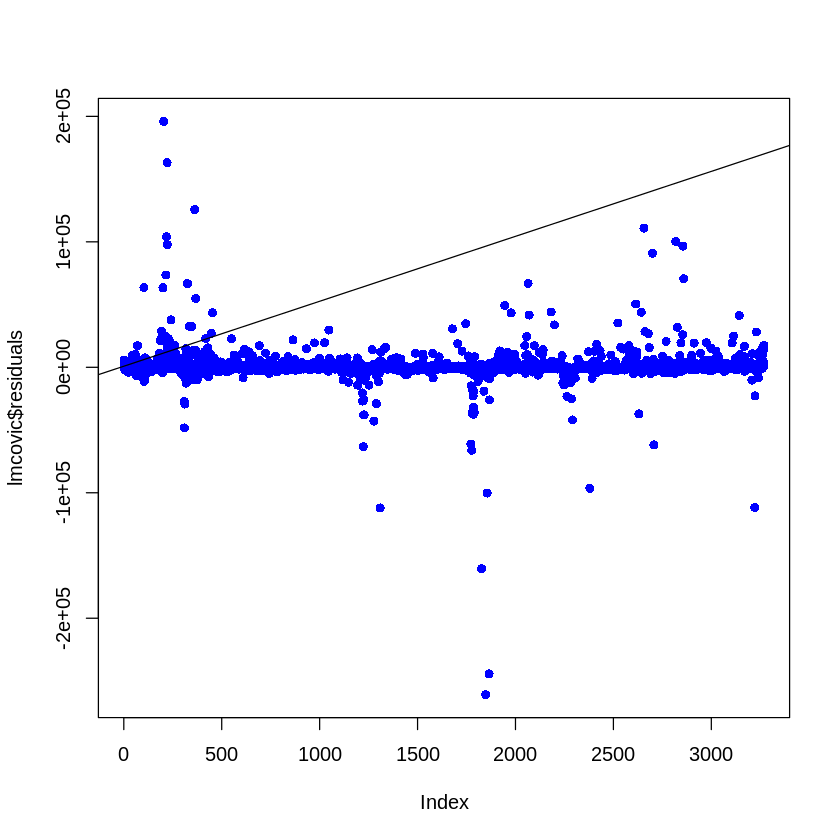

In [99]:
plot(lmcovic$residuals, pch=16, col='blue')
abline(lmcovic)

Warning message in abline(lmcovic2):
“only using the first two of 3 regression coefficients”


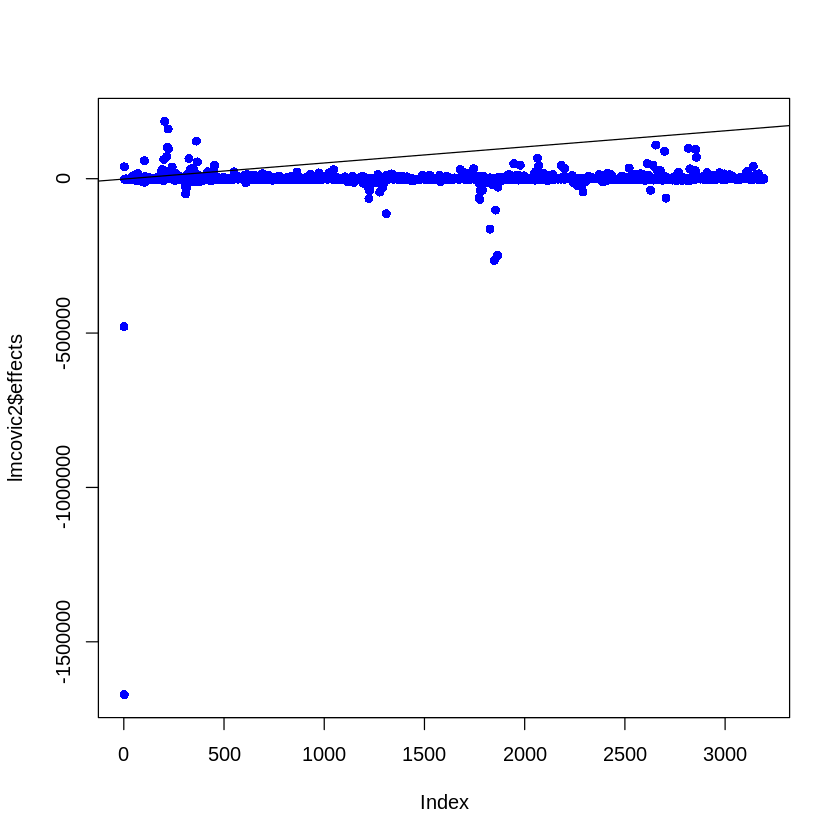

In [100]:
plot(lmcovic2$effects, pch=16, col='blue')
abline(lmcovic2)

#Linear Regression Model 2

The second model we created a validation data set divide to analysis in 652 and 2617, also a training and test set the prediction show us confirmed the cases of deaths have been increase.

In [101]:
set.seed(100)
validationIndex <- caret::createDataPartition(df$deaths, p=0.80, list=FALSE)
validation <- df[-validationIndex,]
dataset <- df[validationIndex,]
dim(validation)
dim(dataset)

[1] 652  14

[1] 2617   14

In [102]:
sum(is.na(dataset))

[1] 300

In [103]:
#Stratified random split of the data set
TrainingIndex <- createDataPartition(df$deaths, p=0.8, list = FALSE)
TrainingSet <- df[TrainingIndex,] # Training Set
TestingSet <- df[-TrainingIndex,] # Test Set


In [104]:
# Build Training model
Model <- train(deaths ~ confirmed, data = TrainingSet,
               method = "lm",
               na.action = na.omit,
               preProcess=c("scale","center"),
               trControl= trainControl(method="none")
)

In [107]:
# Apply model for prediction
Model.training <-predict(Model, TrainingSet) #model to make prediction on Training set
Model.testing <-predict(Model, TestingSet) #model to make prediction on Testing set

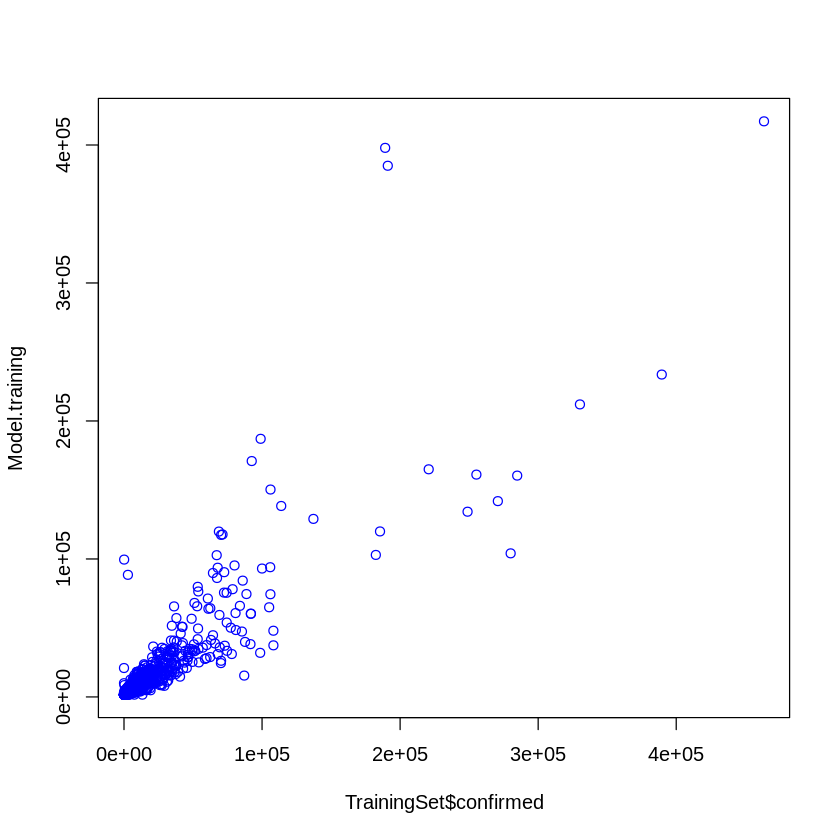

In [123]:
# Scatter plot of Training set performance matrics
plot(TrainingSet$confirmed,Model.training, col = "blue" )


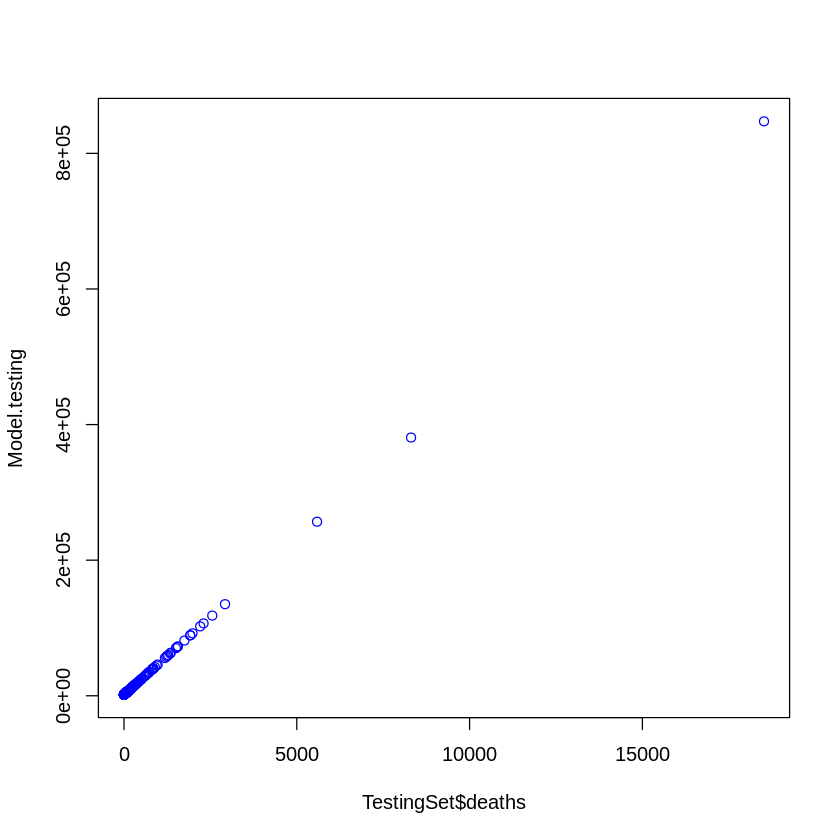

In [124]:
plot(TestingSet$deaths,Model.testing, col = "blue" )

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



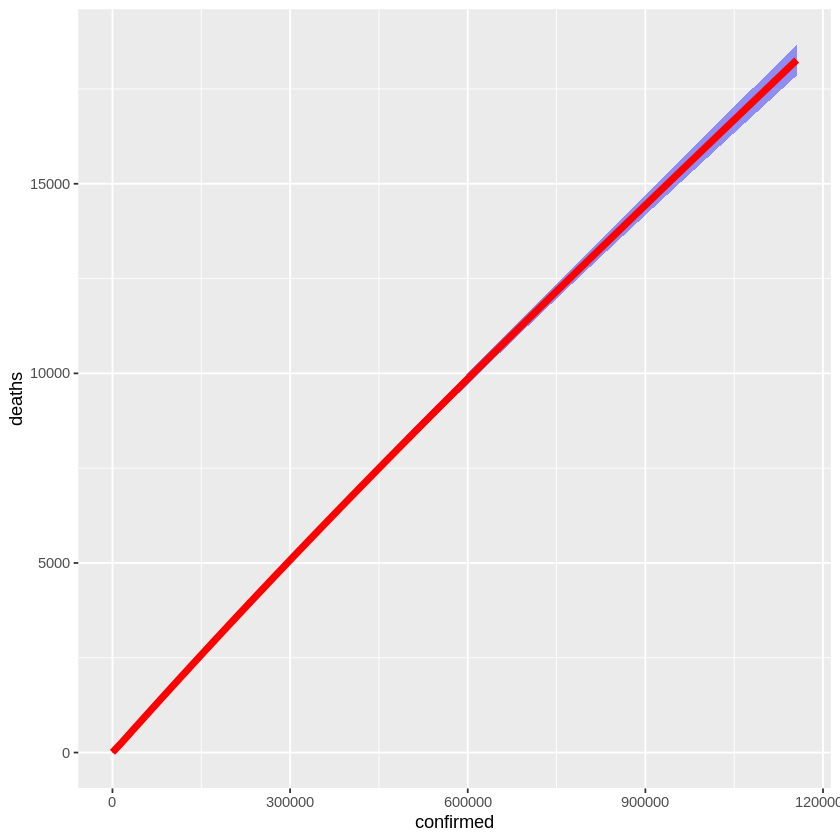

In [194]:
ggplot(data = new_data) + 
  geom_smooth(mapping = aes(x = confirmed, y = deaths), color="red", fill="blue", size=2)

---

Conclusion:

This project shows us in real time how the cases of infection by the Civic 19 virus are evolving, it presents the most relevant analyzes either by states, infected and deaths, which is the maximum and minimum of each one, which is the probability of increasing or decreasing. Persuading self-care turns out to be the greatest impact that this type of information can have on society, as it raises awareness of the risks of not paying attention to biosafety care, the greatest limitation that was found is the few variables to analyze. In the future, different databases could be merged to obtain more information that can assist society in keeping it more informed.